Using Historic_Crypto API ([David-Woroniuk/Historic_Crypto](https://github.com/David-Woroniuk/Historic_Crypto))


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [ ]:
from Historic_Crypto import HistoricalData
import datetime 

tod = datetime.datetime.now()
d = datetime.timedelta(days = 100)
a = tod - d
# print(a.strftime("%Y-%m-%d-00-00"))
new = HistoricalData('ETH-USD',300, a.strftime("%Y-%m-%d-00-00")).retrieve_data()

print(new)

new.to_csv('eth_since_' + a.strftime("%Y%m%d") + '.csv', sep=',')





The first arguments for `HistoricalData` class is symbol/ticker information which you want to return (`str` type), second argument is granularity in seconds (60, 300, 900, 3600, 21600, 86400, `int` type), third argument is start date of the trade history in the format YYYY-MM-DD-HH-MM (`str` type), fourth argument is optional which is end date of the desired trade history in the format of YYYY-MM-DD-HH-MM (`str` type), its default value is now. 
<br>
After that, the record will save the data into a csv file.

Data since July 29, 2022

In [58]:
# stop pandas from using html output for table 
pd.set_option("display.notebook_repr_html", False)


# This is needed if you're using Jupyter to visualize charts:
%matplotlib inline
last100days = 'eth_since_20220729.csv'
data = pd.read_csv(last100days, index_col = 'time')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
data
df_markdown = data.head(10).to_markdown()
display(Markdown(df_markdown))


| time                |     low |    high |    open |   close |   volume |
|:--------------------|--------:|--------:|--------:|--------:|---------:|
| 2022-07-29 00:05:00 | 1724.54 | 1726.83 | 1726.13 | 1725.69 |  427.257 |
| 2022-07-29 00:10:00 | 1717.75 | 1726.12 | 1725.58 | 1720.65 |  626.615 |
| 2022-07-29 00:15:00 | 1689.45 | 1720.89 | 1720.67 | 1699.02 | 5657.57  |
| 2022-07-29 00:20:00 | 1696.42 | 1706.89 | 1698.96 | 1703.48 | 1965.36  |
| 2022-07-29 00:25:00 | 1699.33 | 1705.85 | 1703.82 | 1699.94 | 1266.1   |
| 2022-07-29 00:30:00 | 1698.94 | 1722.57 | 1699.94 | 1715.59 | 1749.64  |
| 2022-07-29 00:35:00 | 1714.84 | 1725.8  | 1715.56 | 1723.24 | 1175.56  |
| 2022-07-29 00:40:00 | 1717.79 | 1724.77 | 1722.77 | 1723.54 |  748.428 |
| 2022-07-29 00:45:00 | 1721.42 | 1734.2  | 1723.54 | 1727.44 | 1130.7   |
| 2022-07-29 00:50:00 | 1724.65 | 1729.99 | 1727.49 | 1726.36 |  735.374 |

Data since Jan 1, 2022

In [59]:
# This is needed if you're using Jupyter to visualize charts:
%matplotlib inline
since2022 = 'eth_since_20220101.csv'
data = pd.read_csv(since2022, index_col = 'time')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
data
df_markdown = data.head(10).to_markdown()
display(Markdown(df_markdown))

| time                |     low |    high |    open |   close |   volume |
|:--------------------|--------:|--------:|--------:|--------:|---------:|
| 2022-01-01 00:05:00 | 3684.96 | 3705.64 | 3688.78 | 3696.76 |  951.396 |
| 2022-01-01 00:10:00 | 3686.4  | 3698.33 | 3696.72 | 3691.29 | 1012.73  |
| 2022-01-01 00:15:00 | 3683.96 | 3691.9  | 3691.25 | 3687.27 |  771.031 |
| 2022-01-01 00:20:00 | 3686.88 | 3698.89 | 3687.27 | 3698.35 |  588.405 |
| 2022-01-01 00:25:00 | 3694    | 3698.82 | 3698.82 | 3696.76 |  303.219 |
| 2022-01-01 00:30:00 | 3692.98 | 3701.53 | 3696.68 | 3700.06 |  355.874 |
| 2022-01-01 00:35:00 | 3700    | 3710    | 3700.37 | 3708    |  494.513 |
| 2022-01-01 00:40:00 | 3705.82 | 3716.52 | 3707.73 | 3713.51 |  579.648 |
| 2022-01-01 00:45:00 | 3710.34 | 3728.87 | 3713.51 | 3722.4  |  737.288 |
| 2022-01-01 00:50:00 | 3718.79 | 3723.61 | 3722.31 | 3721.54 |  764.854 |

In [60]:
df = data.copy()
sma_span = 200
ema_span = 20
df['sma200'] = df['close'].rolling(sma_span).mean()
df['ema20'] = df['close'].ewm(span=ema_span).mean()
df.round(3)
df_markdown = df.head(10).to_markdown()
display(Markdown(df_markdown))

| time                |     low |    high |    open |   close |   volume |   sma200 |   ema20 |
|:--------------------|--------:|--------:|--------:|--------:|---------:|---------:|--------:|
| 2022-01-01 00:05:00 | 3684.96 | 3705.64 | 3688.78 | 3696.76 |  951.396 |      nan | 3696.76 |
| 2022-01-01 00:10:00 | 3686.4  | 3698.33 | 3696.72 | 3691.29 | 1012.73  |      nan | 3693.89 |
| 2022-01-01 00:15:00 | 3683.96 | 3691.9  | 3691.25 | 3687.27 |  771.031 |      nan | 3691.46 |
| 2022-01-01 00:20:00 | 3686.88 | 3698.89 | 3687.27 | 3698.35 |  588.405 |      nan | 3693.45 |
| 2022-01-01 00:25:00 | 3694    | 3698.82 | 3698.82 | 3696.76 |  303.219 |      nan | 3694.25 |
| 2022-01-01 00:30:00 | 3692.98 | 3701.53 | 3696.68 | 3700.06 |  355.874 |      nan | 3695.47 |
| 2022-01-01 00:35:00 | 3700    | 3710    | 3700.37 | 3708    |  494.513 |      nan | 3697.84 |
| 2022-01-01 00:40:00 | 3705.82 | 3716.52 | 3707.73 | 3713.51 |  579.648 |      nan | 3700.55 |
| 2022-01-01 00:45:00 | 3710.34 | 3728.87 | 3713.51 | 3722.4  |  737.288 |      nan | 3704.06 |
| 2022-01-01 00:50:00 | 3718.79 | 3723.61 | 3722.31 | 3721.54 |  764.854 |      nan | 3706.69 |

In [61]:
df.dropna(inplace=True)
df.round(3)
df_markdown = df.round(3).head(10).to_markdown()
display(Markdown(df_markdown))

| time                |     low |    high |    open |   close |   volume |   sma200 |   ema20 |
|:--------------------|--------:|--------:|--------:|--------:|---------:|---------:|--------:|
| 2022-01-01 16:40:00 | 3738.32 | 3744.09 | 3740.25 | 3741.59 |  172.434 |  3718.18 | 3730.75 |
| 2022-01-01 16:45:00 | 3732.41 | 3746.25 | 3741.74 | 3733.97 |  420.403 |  3718.36 | 3731.06 |
| 2022-01-01 16:50:00 | 3730.57 | 3738.97 | 3733.92 | 3731.71 |  397.46  |  3718.56 | 3731.12 |
| 2022-01-01 16:55:00 | 3725.81 | 3732.96 | 3730.79 | 3728.81 |  532.698 |  3718.77 | 3730.9  |
| 2022-01-01 17:00:00 | 3728.81 | 3736.47 | 3728.81 | 3734.38 |  228.033 |  3718.95 | 3731.23 |
| 2022-01-01 17:05:00 | 3730    | 3737.29 | 3734.25 | 3732.68 |  206.906 |  3719.13 | 3731.37 |
| 2022-01-01 17:10:00 | 3728.16 | 3734.05 | 3732.68 | 3730    |  236.126 |  3719.28 | 3731.24 |
| 2022-01-01 17:15:00 | 3729.15 | 3733.6  | 3729.96 | 3731.82 |  167.942 |  3719.4  | 3731.29 |
| 2022-01-01 17:20:00 | 3730.01 | 3734.48 | 3731.76 | 3731.7  |  180.361 |  3719.49 | 3731.33 |
| 2022-01-01 17:25:00 | 3731.19 | 3738.01 | 3731.7  | 3736.01 |  164.374 |  3719.56 | 3731.78 |

In [6]:
def plot_system1(data):
    df = data.copy()
    dates = df.index
    price = df['close']
    sma200 = df['sma200']
    ema20 = df['ema20']
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='ETH price - Daily Close')
        plt.plot(dates, sma200, linewidth=2, label='200 SMA')
        plt.plot(dates, ema20, linewidth=2, label='20 EMA')
        plt.title("ETH-USD, EMA, SMA")
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show() # This is needed only if not in Jupyter

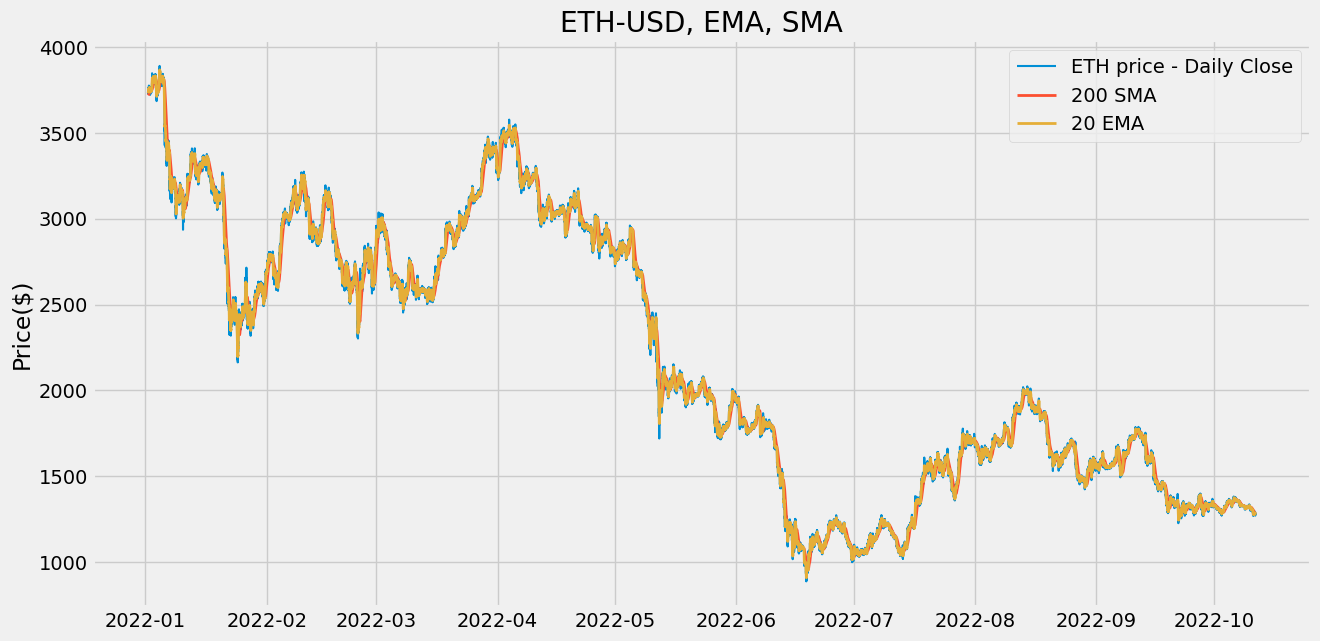

In [7]:
plot_system1(df)


In [62]:
# Our trading condition:
long_positions = np.where(df['ema20'] > df['sma200'], 1, 0)
df['Position'] = long_positions
df.round(3)
df_markdown = df.round(3).head(10).to_markdown()
display(Markdown(df_markdown))

| time                |     low |    high |    open |   close |   volume |   sma200 |   ema20 |   Position |
|:--------------------|--------:|--------:|--------:|--------:|---------:|---------:|--------:|-----------:|
| 2022-01-01 16:40:00 | 3738.32 | 3744.09 | 3740.25 | 3741.59 |  172.434 |  3718.18 | 3730.75 |          1 |
| 2022-01-01 16:45:00 | 3732.41 | 3746.25 | 3741.74 | 3733.97 |  420.403 |  3718.36 | 3731.06 |          1 |
| 2022-01-01 16:50:00 | 3730.57 | 3738.97 | 3733.92 | 3731.71 |  397.46  |  3718.56 | 3731.12 |          1 |
| 2022-01-01 16:55:00 | 3725.81 | 3732.96 | 3730.79 | 3728.81 |  532.698 |  3718.77 | 3730.9  |          1 |
| 2022-01-01 17:00:00 | 3728.81 | 3736.47 | 3728.81 | 3734.38 |  228.033 |  3718.95 | 3731.23 |          1 |
| 2022-01-01 17:05:00 | 3730    | 3737.29 | 3734.25 | 3732.68 |  206.906 |  3719.13 | 3731.37 |          1 |
| 2022-01-01 17:10:00 | 3728.16 | 3734.05 | 3732.68 | 3730    |  236.126 |  3719.28 | 3731.24 |          1 |
| 2022-01-01 17:15:00 | 3729.15 | 3733.6  | 3729.96 | 3731.82 |  167.942 |  3719.4  | 3731.29 |          1 |
| 2022-01-01 17:20:00 | 3730.01 | 3734.48 | 3731.76 | 3731.7  |  180.361 |  3719.49 | 3731.33 |          1 |
| 2022-01-01 17:25:00 | 3731.19 | 3738.01 | 3731.7  | 3736.01 |  164.374 |  3719.56 | 3731.78 |          1 |

In [63]:
buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
df.loc[buy_signals].round(3)
df_markdown = df.loc[buy_signals].round(3).head(10).to_markdown()
display(Markdown(df_markdown))


| time                |     low |    high |    open |   close |   volume |   sma200 |   ema20 |   Position |
|:--------------------|--------:|--------:|--------:|--------:|---------:|---------:|--------:|-----------:|
| 2022-01-02 09:50:00 | 3752.94 | 3760.55 | 3756.58 | 3753.34 |  103.169 |  3750.66 | 3750.69 |          1 |
| 2022-01-02 14:15:00 | 3752.15 | 3756.96 | 3753.14 | 3756.68 |  139.46  |  3749.45 | 3749.57 |          1 |
| 2022-01-02 14:35:00 | 3747.51 | 3757.05 | 3751.09 | 3755.18 |  173.27  |  3749.37 | 3749.86 |          1 |
| 2022-01-03 05:30:00 | 3806.79 | 3822.95 | 3806.91 | 3820.48 |  593.472 |  3798.26 | 3798.41 |          1 |
| 2022-01-03 08:05:00 | 3811.11 | 3818.14 | 3814.73 | 3811.56 |  105.225 |  3806.79 | 3806.93 |          1 |
| 2022-01-03 10:05:00 | 3813.09 | 3815.45 | 3814.02 | 3814.71 |  119.571 |  3807.78 | 3808.26 |          1 |
| 2022-01-04 07:15:00 | 3746.94 | 3757.44 | 3749.06 | 3754.83 |  125.437 |  3749.03 | 3749.36 |          1 |
| 2022-01-05 08:55:00 | 3818.24 | 3822.66 | 3821.13 | 3821.21 |  229.259 |  3814.18 | 3814.32 |          1 |
| 2022-01-05 15:10:00 | 3809.11 | 3818.12 | 3816.71 | 3810.64 |  500.486 |  3807.81 | 3807.81 |          1 |
| 2022-01-06 18:05:00 | 3425.28 | 3434.43 | 3432.37 | 3431.18 |  814.738 |  3415.31 | 3416.2  |          1 |

In [64]:
buy_signals_prev = (df['Position'].shift(-1) == 1) & (df['Position'] == 0)
df.loc[buy_signals | buy_signals_prev].round(3)
df_markdown = df.loc[buy_signals | buy_signals_prev].round(3).head(10).to_markdown()
display(Markdown(df_markdown))

| time                |     low |    high |    open |   close |   volume |   sma200 |   ema20 |   Position |
|:--------------------|--------:|--------:|--------:|--------:|---------:|---------:|--------:|-----------:|
| 2022-01-02 09:45:00 | 3756.23 | 3761.78 | 3761.69 | 3756.58 |  118.031 |  3750.55 | 3750.41 |          0 |
| 2022-01-02 09:50:00 | 3752.94 | 3760.55 | 3756.58 | 3753.34 |  103.169 |  3750.66 | 3750.69 |          1 |
| 2022-01-02 14:10:00 | 3748.81 | 3754.24 | 3751.43 | 3753.14 |  259.738 |  3749.5  | 3748.83 |          0 |
| 2022-01-02 14:15:00 | 3752.15 | 3756.96 | 3753.14 | 3756.68 |  139.46  |  3749.45 | 3749.57 |          1 |
| 2022-01-02 14:30:00 | 3746.65 | 3752.07 | 3746.66 | 3751.02 |  117.841 |  3749.34 | 3749.3  |          0 |
| 2022-01-02 14:35:00 | 3747.51 | 3757.05 | 3751.09 | 3755.18 |  173.27  |  3749.37 | 3749.86 |          1 |
| 2022-01-03 05:25:00 | 3796.53 | 3809.81 | 3797.34 | 3807.08 |  292.734 |  3797.94 | 3796.09 |          0 |
| 2022-01-03 05:30:00 | 3806.79 | 3822.95 | 3806.91 | 3820.48 |  593.472 |  3798.26 | 3798.41 |          1 |
| 2022-01-03 08:00:00 | 3808.59 | 3815.88 | 3808.85 | 3814.73 |  162.579 |  3806.55 | 3806.44 |          0 |
| 2022-01-03 08:05:00 | 3811.11 | 3818.14 | 3814.73 | 3811.56 |  105.225 |  3806.79 | 3806.93 |          1 |

In [41]:
def plot_system1_sig(data):
    df = data.copy()
    dates = df.index
    price = df['close']
    sma200 = df['sma200']
    ema20 = df['ema20']
    
    buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
    buy_marker = sma200 * buy_signals - (sma200.max()*.05)
    buy_marker = buy_marker[buy_signals]
    buy_dates = df.index[buy_signals]
    sell_signals = (df['Position'] == 0) & (df['Position'].shift(1) == 1)
    sell_marker = sma200 * sell_signals + (sma200.max()*.05)
    sell_marker = sell_marker[sell_signals]
    sell_dates = df.index[sell_signals]
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='CPB price - Daily Adj Close')
        plt.plot(dates, sma200, linewidth=2, label='200 SMA')
        plt.plot(dates, ema20, linewidth=2, label='20 EMA')
        plt.scatter(buy_dates, buy_marker, marker='^', color='green', s=160, label='Buy')
        plt.scatter(sell_dates, sell_marker, marker='v', color='red', s=160, label='Sell')
        plt.title("A Simple Crossover System with Signals")
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show() # This is needed only if not in Jupyter

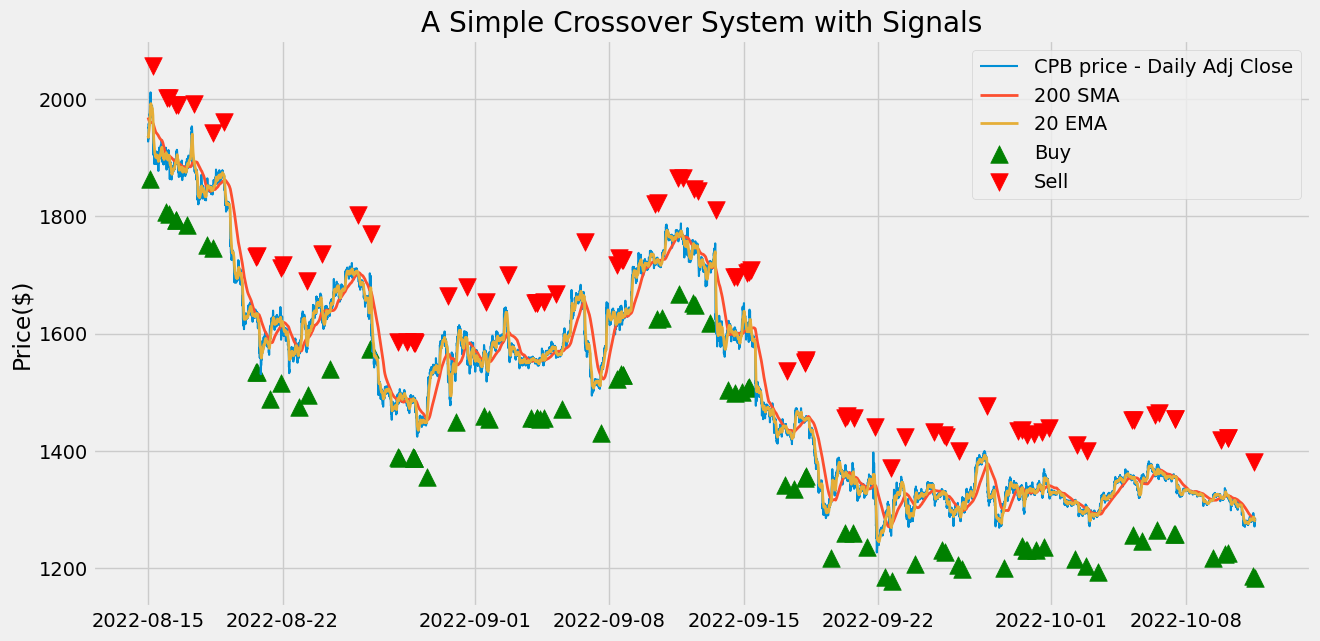

In [11]:
plot_system1_sig(df['2022-8-15':'2022-10-11'])


In [65]:
# The returns of the Buy and Hold strategy:
df['Hold'] = np.log(df['close'] / df['close'].shift(1))
# The returns of the Moving Average strategy:
df['Strategy'] = df['Position'].shift(1) * df['Hold']
# We need to get rid of the NaN generated in the first row:
df.dropna(inplace=True)
df_markdown = df.head(10).to_markdown()
display(Markdown(df_markdown))

| time                |     low |    high |    open |   close |   volume |   sma200 |   ema20 |   Position |         Hold |     Strategy |
|:--------------------|--------:|--------:|--------:|--------:|---------:|---------:|--------:|-----------:|-------------:|-------------:|
| 2022-01-01 16:45:00 | 3732.41 | 3746.25 | 3741.74 | 3733.97 |  420.403 |  3718.36 | 3731.06 |          1 | -0.00203864  | -0.00203864  |
| 2022-01-01 16:50:00 | 3730.57 | 3738.97 | 3733.92 | 3731.71 |  397.46  |  3718.56 | 3731.12 |          1 | -0.000605437 | -0.000605437 |
| 2022-01-01 16:55:00 | 3725.81 | 3732.96 | 3730.79 | 3728.81 |  532.698 |  3718.77 | 3730.9  |          1 | -0.000777426 | -0.000777426 |
| 2022-01-01 17:00:00 | 3728.81 | 3736.47 | 3728.81 | 3734.38 |  228.033 |  3718.95 | 3731.23 |          1 |  0.00149266  |  0.00149266  |
| 2022-01-01 17:05:00 | 3730    | 3737.29 | 3734.25 | 3732.68 |  206.906 |  3719.13 | 3731.37 |          1 | -0.000455333 | -0.000455333 |
| 2022-01-01 17:10:00 | 3728.16 | 3734.05 | 3732.68 | 3730    |  236.126 |  3719.28 | 3731.24 |          1 | -0.000718241 | -0.000718241 |
| 2022-01-01 17:15:00 | 3729.15 | 3733.6  | 3729.96 | 3731.82 |  167.942 |  3719.4  | 3731.29 |          1 |  0.000487817 |  0.000487817 |
| 2022-01-01 17:20:00 | 3730.01 | 3734.48 | 3731.76 | 3731.7  |  180.361 |  3719.49 | 3731.33 |          1 | -3.21564e-05 | -3.21564e-05 |
| 2022-01-01 17:25:00 | 3731.19 | 3738.01 | 3731.7  | 3736.01 |  164.374 |  3719.56 | 3731.78 |          1 |  0.0011543   |  0.0011543   |
| 2022-01-01 17:30:00 | 3735.68 | 3745.61 | 3736.01 | 3743.23 |  380.688 |  3719.67 | 3732.87 |          1 |  0.00193068  |  0.00193068  |

In [13]:
returns = np.exp(df[['Hold', 'Strategy']].sum()) - 1
print(f"Buy and hold return: {round(returns['Hold']*100,2)}%")
print(f"Strategy return: {round(returns['Strategy']*100,2)}%")


Buy and hold return: -65.72%
Strategy return: -11.55%


In [14]:
n_days = len(df)
# Assuming 252 trading days in a year:
ann_returns = 252 / n_days * returns
print(f"Buy and hold annualized return: {round(ann_returns['Hold']*100,2)}%")
print(f"Strategy annualized return:{round(ann_returns['Strategy']*100,2)}%")

Buy and hold annualized return: -0.2%
Strategy annualized return:-0.04%


---

Binance API

In [15]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

import config
client = Client(config.apiKey, config.apiSecurity)

print('Logged in')

# info = client.get_recent_trades(symbol='BNBBTC')




Logged in


In [16]:
import datetime 
tod = datetime.datetime.now()
d = datetime.timedelta(days = 100)
a = tod - d
print(a.strftime("%Y%m%d"))
print(a.strftime("%d %b %Y"))


20221002
02 Oct 2022


In [17]:
def plot_systemETH(data, title):
    df = data.copy()
    dates = df.index
    price = df['Close']
    sma200 = df['sma200']
    ema20 = df['ema20']
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='ETH price')
        plt.plot(dates, sma200, linewidth=2, label='200 SMA')
        plt.plot(dates, ema20, linewidth=2, label='20 EMA')
        plt.title(title)
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show() # This is needed only if not in Jupyter



In [18]:
def plot_system1_sig(data, title):
    df = data.copy()
    dates = df.index
    price = df['Close']
    sma200 = df['sma200']
    ema20 = df['ema20']
    
    buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
    buy_marker = sma200 * buy_signals - (sma200.max()*.05)
    buy_marker = buy_marker[buy_signals]
    buy_dates = df.index[buy_signals]
    sell_signals = (df['Position'] == 0) & (df['Position'].shift(1) == 1)
    sell_marker = sma200 * sell_signals + (sma200.max()*.05)
    sell_marker = sell_marker[sell_signals]
    sell_dates = df.index[sell_signals]
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='ETH price - Daily Adj Close')
        plt.plot(dates, sma200, linewidth=2, label='200 SMA')
        plt.plot(dates, ema20, linewidth=2, label='20 EMA')
        plt.scatter(buy_dates, buy_marker, marker='^', color='green', s=160, label='Buy')
        plt.scatter(sell_dates, sell_marker, marker='v', color='red', s=160, label='Sell')
        plt.title(title)
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show() # This is needed only if not in Jupyter

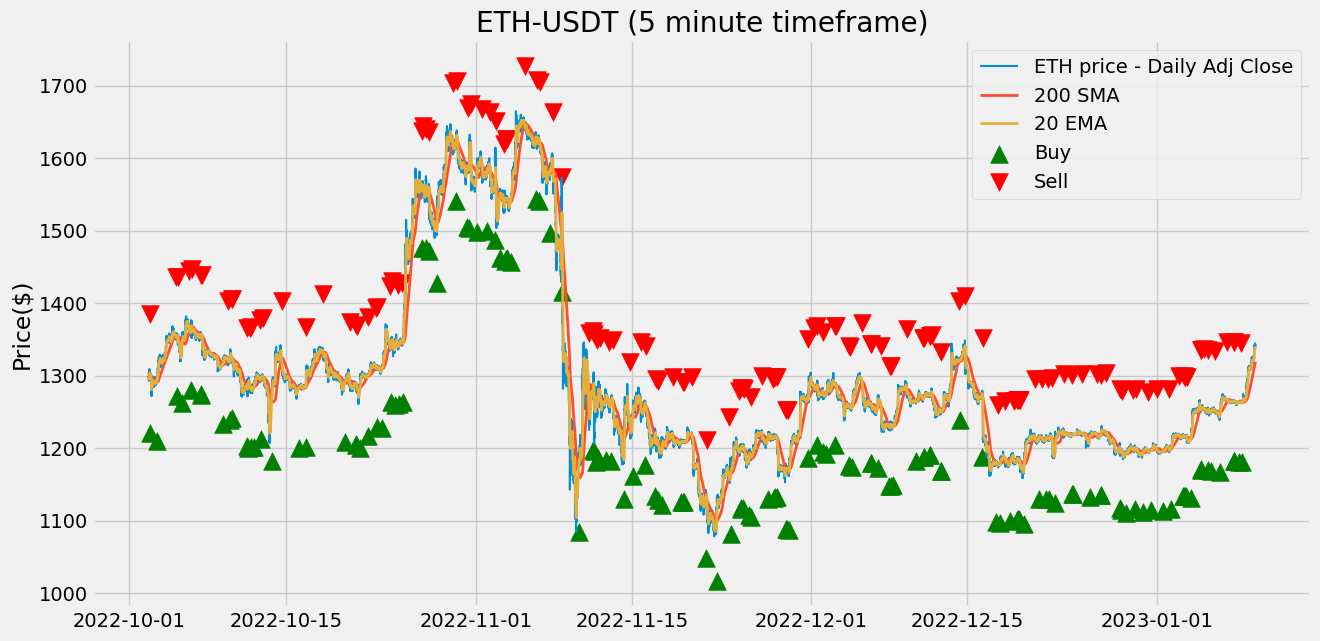

In [19]:
candles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_5MINUTE, a.strftime("%d %b %Y"))
candles_df = pd.DataFrame(candles)
candles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

candles_df.index = pd.to_datetime(candles_df['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
candles_df[numeric_column] = candles_df[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
candles_df['sma200'] = candles_df['Close'].rolling(sma_span).mean()
candles_df['ema20'] = candles_df['Close'].ewm(span=ema_span).mean()
candles_df.round(3)
candles_df.dropna(inplace=True)
candles_df.round(3)
candles_df = candles_df.drop(['Open Time', 'Close Time', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

# plot_systemETH(candles_df, 'ETH-USDT (5 minute timeframe)')

# Our trading condition:
long_positions = np.where(candles_df['ema20'] > candles_df['sma200'], 1, 0)
candles_df['Position'] = long_positions
candles_df.round(3)

buy_signals = (candles_df['Position'] == 1) & (candles_df['Position'].shift(1) == 0)
candles_df.loc[buy_signals].round(3)

buy_signals_prev = (candles_df['Position'].shift(-1) == 1) & (candles_df['Position'] == 0)
candles_df.loc[buy_signals | buy_signals_prev].round(3)

plot_system1_sig(candles_df, 'ETH-USDT (5 minute timeframe)')


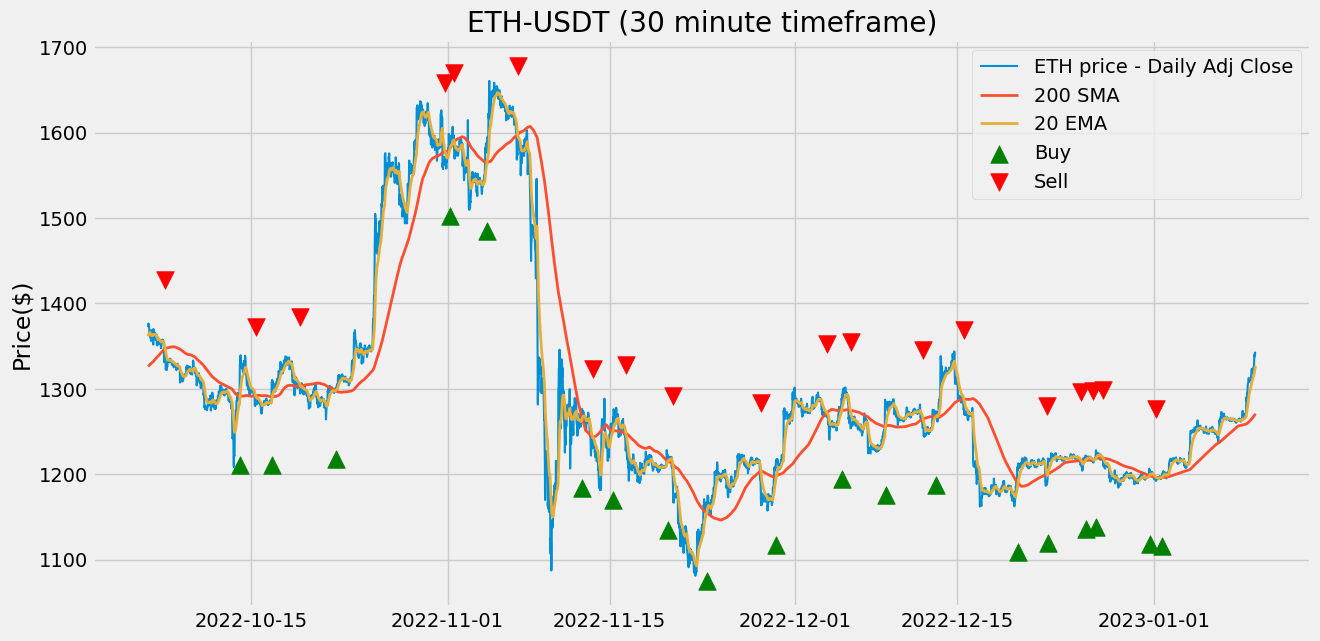

In [20]:
candles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_30MINUTE, a.strftime("%d %b %Y"))
candles_df = pd.DataFrame(candles)
candles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

candles_df.index = pd.to_datetime(candles_df['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
candles_df[numeric_column] = candles_df[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
candles_df['sma200'] = candles_df['Close'].rolling(sma_span).mean()
candles_df['ema20'] = candles_df['Close'].ewm(span=ema_span).mean()
candles_df.round(3)
candles_df.dropna(inplace=True)
candles_df.round(3)
candles_df = candles_df.drop(['Open Time', 'Close Time', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

# plot_systemETH(candles_df, 'ETH-USDT (30 minute timeframe)')

# Our trading condition:
long_positions = np.where(candles_df['ema20'] > candles_df['sma200'], 1, 0)
candles_df['Position'] = long_positions
candles_df.round(3)

buy_signals = (candles_df['Position'] == 1) & (candles_df['Position'].shift(1) == 0)
candles_df.loc[buy_signals].round(3)

buy_signals_prev = (candles_df['Position'].shift(-1) == 1) & (candles_df['Position'] == 0)
candles_df.loc[buy_signals | buy_signals_prev].round(3)

plot_system1_sig(candles_df, 'ETH-USDT (30 minute timeframe)')

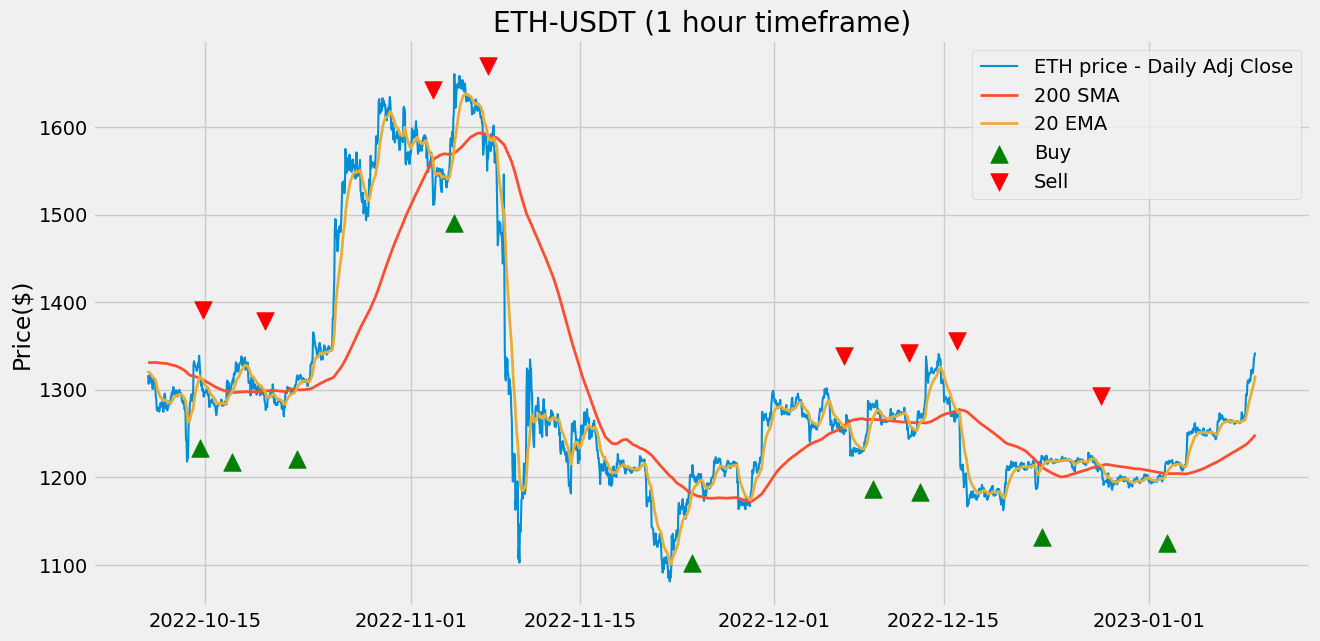

In [21]:
candles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_1HOUR, a.strftime("%d %b %Y"))
candles_df = pd.DataFrame(candles)
candles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

candles_df.index = pd.to_datetime(candles_df['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
candles_df[numeric_column] = candles_df[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
candles_df['sma200'] = candles_df['Close'].rolling(sma_span).mean()
candles_df['ema20'] = candles_df['Close'].ewm(span=ema_span).mean()
candles_df.round(3)
candles_df.dropna(inplace=True)
candles_df.round(3)
candles_df = candles_df.drop(['Open Time', 'Close Time', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

# plot_systemETH(candles_df, 'ETH-USDT (1 hour timeframe)')

# Our trading condition:
long_positions = np.where(candles_df['ema20'] > candles_df['sma200'], 1, 0)
candles_df['Position'] = long_positions
candles_df.round(3)

buy_signals = (candles_df['Position'] == 1) & (candles_df['Position'].shift(1) == 0)
candles_df.loc[buy_signals].round(3)

buy_signals_prev = (candles_df['Position'].shift(-1) == 1) & (candles_df['Position'] == 0)
candles_df.loc[buy_signals | buy_signals_prev].round(3)

plot_system1_sig(candles_df, 'ETH-USDT (1 hour timeframe)')

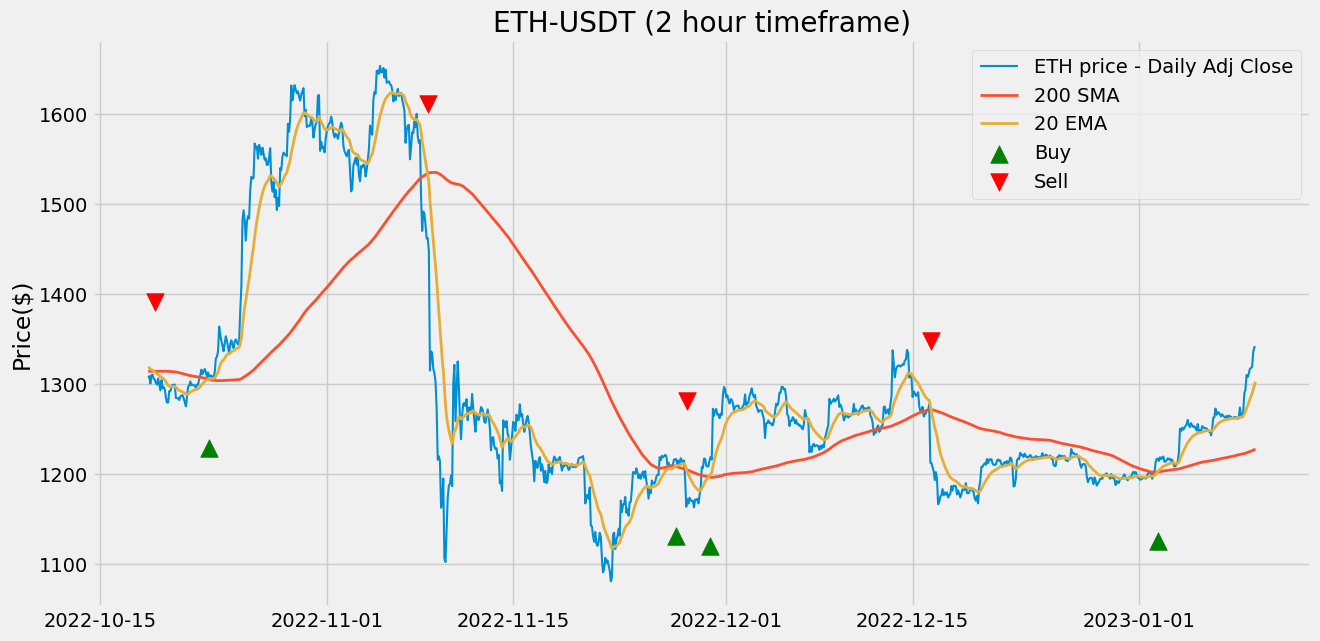

In [22]:
candles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_2HOUR, a.strftime("%d %b %Y"))
candles_df = pd.DataFrame(candles)
candles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

candles_df.index = pd.to_datetime(candles_df['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
candles_df[numeric_column] = candles_df[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
candles_df['sma200'] = candles_df['Close'].rolling(sma_span).mean()
candles_df['ema20'] = candles_df['Close'].ewm(span=ema_span).mean()
candles_df.round(3)
candles_df.dropna(inplace=True)
candles_df.round(3)
candles_df = candles_df.drop(['Open Time', 'Close Time', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

# plot_systemETH(candles_df, 'ETH-USDT (2 hour timeframe)')

# Our trading condition:
long_positions = np.where(candles_df['ema20'] > candles_df['sma200'], 1, 0)
candles_df['Position'] = long_positions
candles_df.round(3)

buy_signals = (candles_df['Position'] == 1) & (candles_df['Position'].shift(1) == 0)
candles_df.loc[buy_signals].round(3)

buy_signals_prev = (candles_df['Position'].shift(-1) == 1) & (candles_df['Position'] == 0)
candles_df.loc[buy_signals | buy_signals_prev].round(3)

plot_system1_sig(candles_df, 'ETH-USDT (2 hour timeframe)')

In [66]:
candles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_12HOUR, a.strftime("%d %b %Y"))
candles_df = pd.DataFrame(candles)
candles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'QUote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
candles_df_copy = candles_df.copy()
candles_df_copy.index = pd.to_datetime(candles_df_copy['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
candles_df_copy[numeric_column] = candles_df_copy[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
candles_df_copy['sma200'] = candles_df_copy['Close'].rolling(sma_span).mean()
candles_df_copy['ema20'] = candles_df_copy['Close'].ewm(span=ema_span).mean()
# candles_df_copy.round(3)
# candles_df_copy.dropna(inplace=True)
candles_df_copy.round(3)
candles_df_copy = candles_df_copy.drop(['Open Time', 'Close Time', 'QUote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

candles_df_copy
df_markdown = candles_df_copy.head(10).to_markdown()
display(Markdown(df_markdown))
# plot_systemETH(candles_df_copy)


| Open Time           |    Open |    High |     Low |   Close |   Volume |   sma200 |   ema20 |
|:--------------------|--------:|--------:|--------:|--------:|---------:|---------:|--------:|
| 2022-10-02 00:00:00 | 1311.79 | 1317.93 | 1280.63 | 1297.87 |   170890 |      nan | 1297.87 |
| 2022-10-02 12:00:00 | 1297.87 | 1313.87 | 1270    | 1276.72 |   200850 |      nan | 1286.77 |
| 2022-10-03 00:00:00 | 1276.72 | 1301.94 | 1263.04 | 1299.01 |   203787 |      nan | 1291.26 |
| 2022-10-03 12:00:00 | 1299.02 | 1329.9  | 1294.44 | 1323.09 |   279988 |      nan | 1300.45 |
| 2022-10-04 00:00:00 | 1323.1  | 1359.67 | 1318.66 | 1349.74 |   234666 |      nan | 1312.37 |
| 2022-10-04 12:00:00 | 1349.74 | 1369.55 | 1338.12 | 1361.49 |   241542 |      nan | 1322.73 |
| 2022-10-05 00:00:00 | 1361.5  | 1363.53 | 1331.41 | 1335.05 |   169292 |      nan | 1325.06 |
| 2022-10-05 12:00:00 | 1335.05 | 1364.77 | 1316.29 | 1352.2  |   314217 |      nan | 1329.75 |
| 2022-10-06 00:00:00 | 1352.2  | 1383.99 | 1351.5  | 1368.75 |   273827 |      nan | 1336.01 |
| 2022-10-06 12:00:00 | 1368.75 | 1380.3  | 1345.01 | 1352.06 |   300148 |      nan | 1338.43 |

In [24]:
def plot_system1_sig(data, title):
    df = data.copy()
    dates = df.index
    price = df['Close']
    sma200 = df['sma200']
    ema20 = df['ema20']
    
    buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
    buy_marker = sma200 * buy_signals - (sma200.max()*.05)
    buy_marker = buy_marker[buy_signals]
    buy_dates = df.index[buy_signals]
    sell_signals = (df['Position'] == 0) & (df['Position'].shift(1) == 1)
    sell_marker = sma200 * sell_signals + (sma200.max()*.05)
    sell_marker = sell_marker[sell_signals]
    sell_dates = df.index[sell_signals]
    
    df['OpenTime'] = df.index
    df.loc[(df['Position'] == 1) & (df['Position'].shift(1) == 0), 'ep'] = df['Open']
    df.loc[(df['Position'] == 1) & (df['Position'].shift(1) == 0), 'date_time'] = df['OpenTime']
    df = df.fillna(method='ffill')


    df.loc[sell_signals, 'tp'] = df['Open'] - 10.00
    df.loc[sell_signals, 'sl'] = df['Open'] + 10.00
    df.loc[buy_signals, 'tp'] = df['Open'] + 10.00
    df.loc[buy_signals, 'sl'] = df['Open'] - 10.00
    df = df.fillna(method='ffill')

    df['outcome'] = ' '
    df.loc[(df['Position'] == 1) & (df['Close'] > df['tp']), 'outcome'] = 'WIN'
    df.loc[(df['Position'] == 1) & (df['Close'] < df['sl']), 'outcome'] = 'LOSS'
    df.loc[(df['Position'] == 0) & (df['Close'] < df['tp']), 'outcome'] = 'WIN'
    df.loc[(df['Position'] == 0) & (df['Close'] > df['sl']), 'outcome'] = 'LOSS'

    df.rename(columns= {'ot': 'Open Time'}, inplace=True)

    df2=df.reset_index()
    df2['ts'] = df2['Open Time'].astype('int64') // 10**9
    df2['outcome'] = df2['outcome'].replace(' ', np.nan)
    df2 = df2.dropna(subset=['outcome'])

    df3 = df2.groupby(['tp', 'outcome'], as_index=False)
    df3 = df3.first()
    df3['Open Time'] = pd.to_datetime(df3['ts'], unit='s')
    df3.set_index("Open Time", inplace = True)
    df3 = df2.groupby(['tp'], as_index=False)
    df3 = df3.first()
    df3.set_index("Open Time", inplace = True)
    df3 = df3.sort_index()

    df4 = df3.set_index('date_time')
    df4 = df4.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'sma200', 'ema20', 'OpenTime', 'ts'], axis=1)
    df4 = df4[['Position', 'ep', 'tp', 'sl', 'outcome']]
    df4.loc[df4['Position'] == 1, ['Position']] = 'Long'
    df4.loc[df4['Position'] == 0, ['Position']] = 'Short'


    df4.to_csv(title + datetime.datetime.now().strftime("%Y%m%d") + '.csv', sep=',')

    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='ETH price - Daily Adj Close')
        plt.plot(dates, sma200, linewidth=2, label='200 SMA')
        plt.plot(dates, ema20, linewidth=2, label='20 EMA')
        plt.scatter(buy_dates, buy_marker, marker='^', color='green', s=160, label='Buy')
        plt.scatter(sell_dates, sell_marker, marker='v', color='red', s=160, label='Sell')
        plt.scatter(df3.index, df3['tp'], marker='*', color="black", s=160)
        plt.title(title)
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show() # This is needed only if not in Jupyter

2 hour timeframe is chose.

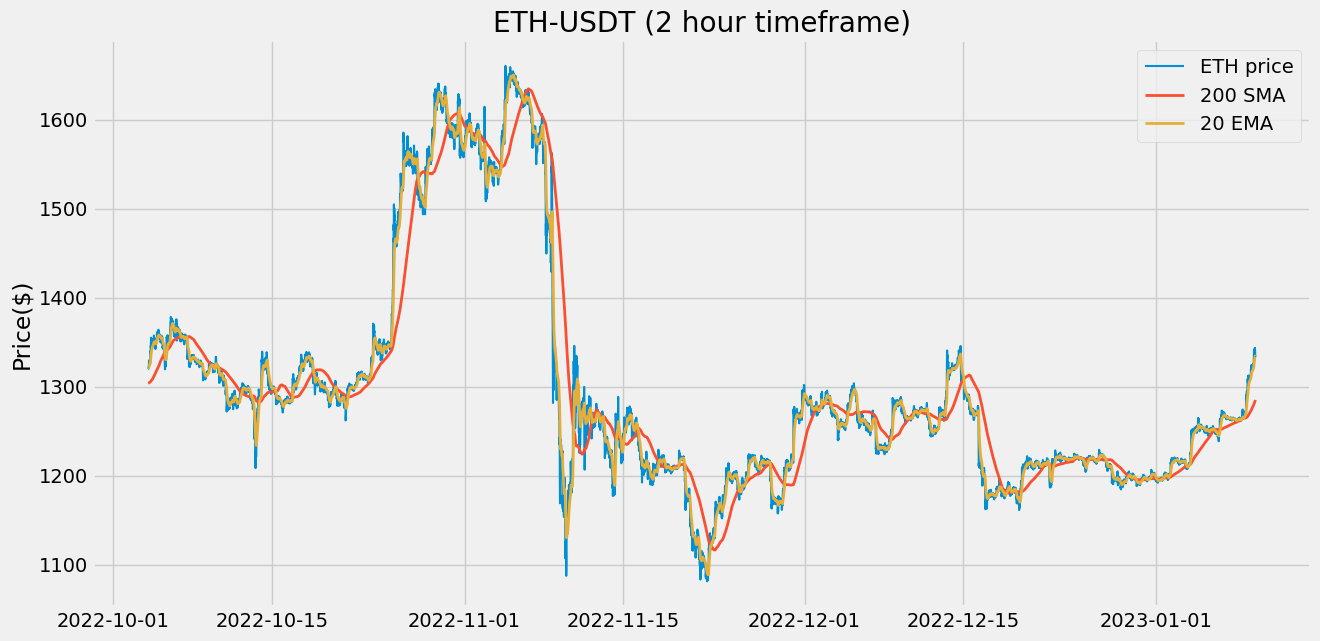

In [68]:
hourlycandles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_15MINUTE, a.strftime("%d %b %Y"))
hourlycandles_df = pd.DataFrame(hourlycandles)
hourlycandles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

hourlycandles_df.index = pd.to_datetime(hourlycandles_df['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
hourlycandles_df[numeric_column] = hourlycandles_df[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
hourlycandles_df['sma200'] = hourlycandles_df['Close'].rolling(sma_span).mean()
hourlycandles_df['ema20'] = hourlycandles_df['Close'].ewm(span=ema_span).mean()
hourlycandles_df.round(3)
hourlycandles_df.dropna(inplace=True)
hourlycandles_df.round(3)
hourlycandles_df = hourlycandles_df.drop(['Open Time', 'Close Time', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

plot_systemETH(hourlycandles_df, 'ETH-USDT (2 hour timeframe)')

In [69]:
hourlycandles_df
df_markdown = hourlycandles_df.head(10).to_markdown()
display(Markdown(df_markdown))

| Open Time           |    Open |    High |     Low |   Close |   Volume |   sma200 |   ema20 |
|:--------------------|--------:|--------:|--------:|--------:|---------:|---------:|--------:|
| 2022-10-04 01:45:00 | 1321.94 | 1322.6  | 1319.45 | 1319.48 |  2056.27 |  1303.78 | 1321.32 |
| 2022-10-04 02:00:00 | 1319.48 | 1320.96 | 1318.66 | 1319.59 |  2049.95 |  1303.82 | 1321.16 |
| 2022-10-04 02:15:00 | 1319.59 | 1320.85 | 1319.09 | 1319.93 |  2061.49 |  1303.86 | 1321.04 |
| 2022-10-04 02:30:00 | 1319.93 | 1321.89 | 1319.78 | 1320.87 |  1443.72 |  1303.9  | 1321.02 |
| 2022-10-04 02:45:00 | 1320.87 | 1322.45 | 1319.71 | 1321.37 |  1721.74 |  1303.96 | 1321.06 |
| 2022-10-04 03:00:00 | 1321.36 | 1322.07 | 1319.53 | 1321.93 |  1180.48 |  1304.03 | 1321.14 |
| 2022-10-04 03:15:00 | 1321.93 | 1325.74 | 1321.82 | 1324.04 |  2262.16 |  1304.11 | 1321.42 |
| 2022-10-04 03:30:00 | 1324.03 | 1330    | 1323.7  | 1329.41 |  4260.89 |  1304.21 | 1322.18 |
| 2022-10-04 03:45:00 | 1329.41 | 1330    | 1327.66 | 1329    |  3692.5  |  1304.31 | 1322.83 |
| 2022-10-04 04:00:00 | 1329.01 | 1330.38 | 1326.49 | 1326.95 |  3468.41 |  1304.41 | 1323.22 |

In [70]:
hourlycandles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_1HOUR, a.strftime("%d %b %Y"))
hourlycandles_df = pd.DataFrame(hourlycandles)
hourlycandles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

hourlycandles_df.index = pd.to_datetime(hourlycandles_df['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
hourlycandles_df[numeric_column] = hourlycandles_df[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
hourlycandles_df['sma200'] = hourlycandles_df['Close'].rolling(sma_span).mean()
hourlycandles_df['ema20'] = hourlycandles_df['Close'].ewm(span=ema_span).mean()
hourlycandles_df.round(3)
hourlycandles_df.dropna(inplace=True)
hourlycandles_df.round(3)
hourlycandles_df = hourlycandles_df.drop(['Open Time', 'Close Time', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

# plot_systemETH(hourlycandles_df, 'ETH-USDT (2 hour timeframe)')

# identify long and short position
long_positions = np.where(hourlycandles_df['ema20'] > hourlycandles_df['sma200'], 1, 0)
hourlycandles_df['Position'] = long_positions
hourlycandles_df.round(3)

# set the entry point and entry time ('ep', 'date_time') for buy and sell
hourlycandles_df['OpenTime'] = hourlycandles_df.index
buy_signals = (hourlycandles_df['Position'] == 1) & (hourlycandles_df['Position'].shift(1) == 0) # when position is 0 and the next row (-ve means after) is postion 1
sell_signals = (hourlycandles_df['Position'] == 0) & (hourlycandles_df['Position'].shift(1) == 1)
hourlycandles_df.loc[(buy_signals | sell_signals), 'ep'] = hourlycandles_df['Open']
hourlycandles_df.loc[(buy_signals | sell_signals), 'date_time'] = hourlycandles_df['OpenTime']

# fill the empty cell with value from previous row
hourlycandles_df = hourlycandles_df.fillna(method='ffill')

# set tp and sl of sell to 1000 pips below and above 
hourlycandles_df.loc[sell_signals, 'tp'] = hourlycandles_df['Open'] - 10.00
hourlycandles_df.loc[sell_signals, 'sl'] = hourlycandles_df['Open'] + 10.00
# set tp and sl of buy to 1000 pips above and below 
hourlycandles_df.loc[buy_signals, 'tp'] = hourlycandles_df['Open'] + 10.00
hourlycandles_df.loc[buy_signals, 'sl'] = hourlycandles_df['Open'] - 10.00

# fill the empty cell with value from previous row
hourlycandles_df = hourlycandles_df.fillna(method='ffill')

# identify the winning and lossing trade
hourlycandles_df['outcome'] = ' '
hourlycandles_df.loc[(hourlycandles_df['Position'] == 1) & (hourlycandles_df['Close'] > hourlycandles_df['tp']), 'outcome'] = 'WIN'
hourlycandles_df.loc[(hourlycandles_df['Position'] == 1) & (hourlycandles_df['Close'] < hourlycandles_df['sl']), 'outcome'] = 'LOSS'
hourlycandles_df.loc[(hourlycandles_df['Position'] == 0) & (hourlycandles_df['Close'] < hourlycandles_df['tp']), 'outcome'] = 'WIN'
hourlycandles_df.loc[(hourlycandles_df['Position'] == 0) & (hourlycandles_df['Close'] > hourlycandles_df['sl']), 'outcome'] = 'LOSS'

# get a new empty column to store index value 'Open Time'
# hourlycandles_df.rename(columns= {'ot': 'Open Time'}, inplace=True)

# reset index 
df2=hourlycandles_df.reset_index()

# create a new column 'ts' (stand for timestamp) to store the time. Neede to convert to timestamp format because the year, month, date type format will be excluded after we regroup in the future step
df2['ts'] = df2['Open Time'].astype('int64') // 10**9

# # drop the empty cell, by replace the empty with NaN then using dropna function
df2['outcome'] = df2['outcome'].replace(' ', np.nan)
df2 = df2.dropna(subset=['outcome'])

# # group by 'tp' and get first outcome of the buy/sell 
df3 = df2.groupby(['tp'], as_index=False)
df3 = df3.first()

# when grouped, 'Open Time' column will disolve. So I create a new column 'Open Time', the reference to column 'ts' and convert to year, month, date format
df3['Open Time'] = pd.to_datetime(df3['ts'], unit='s')
df3.set_index("date_time", inplace = True)
df3 = df3.sort_index()

# rename column, drop unuse column and sort the column according to given order
df3.rename(columns= {'Open Time': 'Exit Time'}, inplace=True)
df3 = df3[['Position', 'ep', 'tp', 'sl', 'outcome', 'Exit Time', 'Close']]

# at column 'position' change the value of 1 to long and 0 to short
df3.loc[df3['Position'] == 1, ['Position']] = 'Long'
df3.loc[df3['Position'] == 0, ['Position']] = 'Short'
df3
df_markdown = df3.head(10).to_markdown()
display(Markdown(df_markdown))


| date_time           | Position   |      ep |      tp |      sl | outcome   | Exit Time           |   Close |
|:--------------------|:-----------|--------:|--------:|--------:|:----------|:--------------------|--------:|
| 2022-10-14 13:00:00 | Long       | 1338.74 | 1348.74 | 1328.74 | LOSS      | 2022-10-14 14:00:00 | 1320.3  |
| 2022-10-14 19:00:00 | Short      | 1300.21 | 1290.21 | 1310.21 | WIN       | 2022-10-15 08:00:00 | 1280.47 |
| 2022-10-17 05:00:00 | Long       | 1305.05 | 1315.05 | 1295.05 | WIN       | 2022-10-17 09:00:00 | 1317.98 |
| 2022-10-19 22:00:00 | Short      | 1294.33 | 1284.33 | 1304.33 | WIN       | 2022-10-20 00:00:00 | 1276.85 |
| 2022-10-22 14:00:00 | Long       | 1310.29 | 1320.29 | 1300.29 | WIN       | 2022-10-23 17:00:00 | 1328.69 |
| 2022-11-02 20:00:00 | Short      | 1535.93 | 1525.93 | 1545.93 | WIN       | 2022-11-02 20:00:00 | 1511.27 |
| 2022-11-04 13:00:00 | Long       | 1609.72 | 1619.72 | 1599.72 | WIN       | 2022-11-04 14:00:00 | 1660.45 |
| 2022-11-07 09:00:00 | Short      | 1568.08 | 1558.08 | 1578.08 | LOSS      | 2022-11-07 10:00:00 | 1578.54 |
| 2022-11-24 06:00:00 | Long       | 1200.88 | 1210.88 | 1190.88 | WIN       | 2022-11-24 06:00:00 | 1214.01 |
| 2022-12-06 18:00:00 | Short      | 1251.7  | 1241.7  | 1261.7  | LOSS      | 2022-12-06 23:00:00 | 1271.32 |

Strategy returns

In [71]:
# The returns of the Buy and Hold strategy:
hourlycandles_df['Hold'] = np.log(hourlycandles_df['Close'] / hourlycandles_df['Close'].shift(1))
# The returns of the Moving Average strategy:
hourlycandles_df['Strategy'] = hourlycandles_df['Position'].shift(1) * hourlycandles_df['Hold']
# We need to get rid of the NaN generated in the first row:
hourlycandles_df.dropna(inplace=True)
hourlycandles_df
df_markdown = hourlycandles_df.head(10).to_markdown()
display(Markdown(df_markdown))

| Open Time           |    Open |    High |     Low |   Close |   Volume |   sma200 |   ema20 |   Position | OpenTime            |      ep | date_time           |      tp |      sl | outcome   |        Hold |    Strategy |
|:--------------------|--------:|--------:|--------:|--------:|---------:|---------:|--------:|-----------:|:--------------------|--------:|:--------------------|--------:|--------:|:----------|------------:|------------:|
| 2022-10-14 13:00:00 | 1338.74 | 1339.23 | 1328.01 | 1330.83 |  41654.3 |  1313.24 | 1314.78 |          1 | 2022-10-14 13:00:00 | 1338.74 | 2022-10-14 13:00:00 | 1348.74 | 1328.74 |           | -0.00592607 | -0          |
| 2022-10-14 14:00:00 | 1330.83 | 1330.91 | 1310.63 | 1320.3  |  70222.4 |  1313.02 | 1315.3  |          1 | 2022-10-14 14:00:00 | 1338.74 | 2022-10-14 13:00:00 | 1348.74 | 1328.74 | LOSS      | -0.00794382 | -0.00794382 |
| 2022-10-14 15:00:00 | 1320.31 | 1324.5  | 1305.89 | 1310.04 |  37361   |  1312.73 | 1314.8  |          1 | 2022-10-14 15:00:00 | 1338.74 | 2022-10-14 13:00:00 | 1348.74 | 1328.74 | LOSS      | -0.00780131 | -0.00780131 |
| 2022-10-14 16:00:00 | 1310.04 | 1313.22 | 1298    | 1304.63 |  39676.6 |  1312.46 | 1313.83 |          1 | 2022-10-14 16:00:00 | 1338.74 | 2022-10-14 13:00:00 | 1348.74 | 1328.74 | LOSS      | -0.0041382  | -0.0041382  |
| 2022-10-14 17:00:00 | 1304.63 | 1309.25 | 1300.62 | 1308.62 |  18059.8 |  1312.22 | 1313.34 |          1 | 2022-10-14 17:00:00 | 1338.74 | 2022-10-14 13:00:00 | 1348.74 | 1328.74 | LOSS      |  0.00305367 |  0.00305367 |
| 2022-10-14 18:00:00 | 1308.62 | 1308.63 | 1294    | 1300.22 |  26903.2 |  1311.93 | 1312.09 |          1 | 2022-10-14 18:00:00 | 1338.74 | 2022-10-14 13:00:00 | 1348.74 | 1328.74 | LOSS      | -0.00643967 | -0.00643967 |
| 2022-10-14 19:00:00 | 1300.21 | 1306.17 | 1295    | 1298.72 |  22313.9 |  1311.58 | 1310.81 |          0 | 2022-10-14 19:00:00 | 1300.21 | 2022-10-14 19:00:00 | 1290.21 | 1310.21 |           | -0.00115432 | -0.00115432 |
| 2022-10-14 20:00:00 | 1298.71 | 1304.07 | 1296.29 | 1300.93 |  11201.6 |  1311.25 | 1309.87 |          0 | 2022-10-14 20:00:00 | 1300.21 | 2022-10-14 19:00:00 | 1290.21 | 1310.21 |           |  0.00170023 |  0          |
| 2022-10-14 21:00:00 | 1300.93 | 1302.62 | 1290    | 1292.15 |  16398.5 |  1310.89 | 1308.18 |          0 | 2022-10-14 21:00:00 | 1300.21 | 2022-10-14 19:00:00 | 1290.21 | 1310.21 |           | -0.0067719  | -0          |
| 2022-10-14 22:00:00 | 1292.15 | 1296.31 | 1290.32 | 1295.78 |  10543.1 |  1310.51 | 1307    |          0 | 2022-10-14 22:00:00 | 1300.21 | 2022-10-14 19:00:00 | 1290.21 | 1310.21 |           |  0.00280533 |  0          |

In [48]:
returns = np.exp(hourlycandles_df[['Hold', 'Strategy']].sum()) - 1
print(f"Buy and hold return: {round(returns['Hold']*100,2)}%")
print(f"Strategy return: {round(returns['Strategy']*100,2)}%")


Buy and hold return: -0.36%
Strategy return: 15.26%


In [49]:
n_days = len(hourlycandles_df)
# Assuming 252 trading days in a year:
ann_returns = 252 / n_days * returns
print(f"Buy and hold annualized return: {round(ann_returns['Hold']*100,2)}%")
print(f"Strategy annualized return:{round(ann_returns['Strategy']*100,2)}%")

Buy and hold annualized return: -0.04%
Strategy annualized return:1.84%
